In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import random

import sys
from Bio import Entrez

In [2]:
driver_map_data_all_df = pd.read_csv('DriverMapTPM.tsv',delimiter='\t')
driver_map_data_all_df = driver_map_data_all_df.set_index('target')
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']
driver_map_data_all_df.head()

,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
target,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,0.000,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,0.00000,0.546198,48.0853,74.59220,26.27370,1.19616,45.71820,2.83643,122.2470
13331|PEX14,19.08750,14.08670,0.000,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,0.00000,33.521000,26.2342,24.65790,36.15540,15.84860,18.20870,14.82460,34.4379
6630|RAD52,3.66106,4.29017,0.000,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,3.60232,7.170180,10.8381,6.08676,6.61974,3.46454,7.99667,2.27730,8.2883
16802|CLYBL,11.47500,12.58540,34.475,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,...,9.44277,38.90040,11.170000,12.2971,4.87524,24.46830,21.38690,12.00770,3.81662,16.9272
6645|RANBP1,71.64050,79.22280,0.000,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,7.38547,35.480200,105.3570,93.05350,46.65610,24.73280,47.38680,41.90630,118.2290


In [3]:
# create data frame for driver map original samples 
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

#switch_driver_map_data_log_df


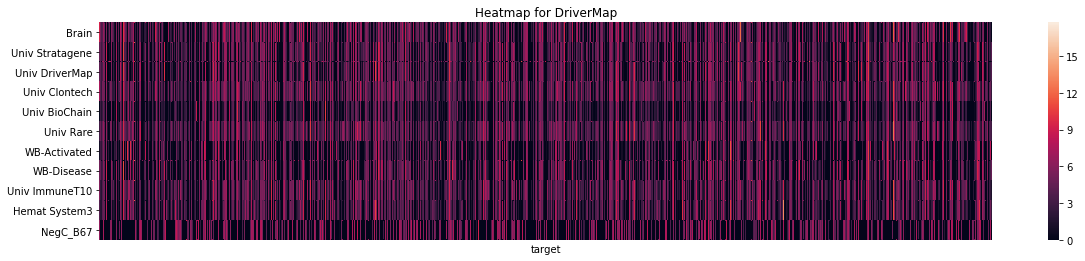

In [4]:
# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_original.csv')


In [5]:
# operations performed to conferm that all target genes are unique values
gene_list = driver_map_data_df.index.tolist() # number of genes 18989
unique_genes = list(driver_map_data_df.index.unique())
unique_genes_split = driver_map_data_df.index.str.split('|')

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989
gene_name_list[0]

'CENPU'

In [7]:
gene_name_list_str = str(gene_name_list).replace("[", "")
gene_name_list_str = gene_name_list_str.replace("]", "")
gene_name_list_str = gene_name_list_str.replace("'", "")


In [8]:
# Make DF for DriverMap original samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']
#driver_map_data_df.reset_index()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

min_value_list = list(driver_map_data_df.min())
max_value_list = list(driver_map_data_df.max())
mean_value_list = list(driver_map_data_df.mean())
std_value_list = list(driver_map_data_df.std())
mean_value_list = list(driver_map_data_df.mean())
median_value_list = list(driver_map_data_df.median())
q1_value_list = list(driver_map_data_df.quantile(.25))
q3_value_list = list(driver_map_data_df.quantile(.75))

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_original.csv')

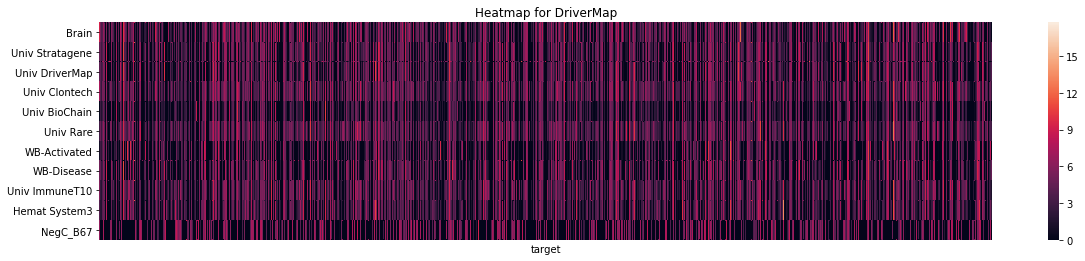

In [9]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
    
#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_BSA.csv')

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_BSA.csv')

In [142]:
id_list = gene_name_list[0:50]
gene_string = " ".join(str(x) for x in id_list)
gene_string = gene_string.replace("[", "")
gene_string = gene_string.replace("]", ",")
gene_string = gene_string.replace("'", "")
gene_string

'CENPU, PEX14, RAD52, CLYBL, RANBP1, KDF1, TBC1D30, TMEM258, LRG1, HYAL1, DGAT2L6, GAD1, SRGN, UBE2D1, EDA, PTCD2, TNFSF10, KIAA1107, CAMKK2, GRAMD4, CLCN2, TAF5, ZNF146, POLK, FTCD, FFAR2, SNX24, EIF1B, BCAR3, NUP58, FNIP1, ENPP7, FER, CD74, CAND1, KIF21B, ARHGAP5, APBA3, CRHBP, IGFBP3, OR1A1, TAS2R30, TGIF2LY, ALAD, ZNF274, ATP9B, SOX30, TPD52L1, TOMM22, ZNF84,'

In [12]:
import requests, sys
 
server = "http://grch37.rest.ensembl.org"
ext = "/eqtl/id/homo_sapiens/CENPU?;tissue={tissue};statistic=p-value"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
pprint(decoded)

HTTPError: 400 Client Error: Bad Request for url: http://grch37.rest.ensembl.org/eqtl/id/homo_sapiens/CENPU?;tissue=Brain;statistic=p-value

In [147]:
mg.getgene('PEX14')
PEX14 = mg.query('symbol:PEX14', species='human')
PEX14

{'max_score': 87.74501,
 'took': 5,
 'total': 1,
 'hits': [{'_id': '5195',
   '_score': 87.74501,
   'entrezgene': '5195',
   'name': 'peroxisomal biogenesis factor 14',
   'symbol': 'PEX14',
   'taxid': 9606}]}

In [23]:
base_tpm = pd.read_csv('E-MTAB-5214-query-results.tpms.tsv',delimiter='\t')

base_tpm = base_tpm.set_index('Gene ID')
base_tpm.head()
base_tpm.columns

Index(['Gene Name', 'Brodmann (1909) area 24', 'Brodmann (1909) area 9',
       'C1 segment of cervical spinal cord', 'EBV-transformed lymphocyte',
       'adrenal gland', 'amygdala', 'aorta', 'atrium auricular region',
       'blood', 'breast', 'caudate nucleus', 'cerebellar hemisphere',
       'cerebellum', 'cerebral cortex', 'coronary artery', 'cortex of kidney',
       'ectocervix', 'endocervix', 'esophagogastric junction',
       'esophagus mucosa', 'esophagus muscularis mucosa', 'fallopian tube',
       'greater omentum', 'heart left ventricle', 'hippocampus proper',
       'hypothalamus', 'liver', 'lower leg skin', 'lung',
       'minor salivary gland', 'nucleus accumbens', 'ovary', 'pancreas',
       'pituitary gland', 'prostate gland', 'putamen', 'sigmoid colon',
       'skeletal muscle tissue', 'small intestine Peyer's patch', 'spleen',
       'stomach', 'subcutaneous adipose tissue', 'substantia nigra',
       'suprapubic skin', 'testis', 'thyroid gland', 'tibial artery',
  

In [30]:
base_tpm['Brain'] = (base_tpm['Brodmann (1909) area 24'] + base_tpm['Brodmann (1909) area 9'] +
                         base_tpm['C1 segment of cervical spinal cord'] + base_tpm['amygdala'] +
                         base_tpm['caudate nucleus'] + base_tpm['cerebellar hemisphere'] + base_tpm['cerebellum'] +
                         base_tpm['cerebral cortex'] + base_tpm['hippocampus proper'] + base_tpm['hypothalamus'] +
                         base_tpm['nucleus accumbens'] + base_tpm['pituitary gland'] + base_tpm['putamen'] +
                         base_tpm['substantia nigra'])/14
#base_tpm['F_Reproductive Sys'] = + base_tpm[''] + base_tpm[''] + base_tpm[''] + base_tpm[''] + base_tpm[''] + 
#base_tpm['Kidneys'] = + base_tpm['cortex of kidney'] + base_tpm['adrenal gland'] + base_tpm[''] + base_tpm[''] + base_tpm[''] + 

In [ ]:
(['Gene Name', 
      'Brodmann (1909) area 24', 
      'Brodmann (1909) area 9',
      'C1 segment of cervical spinal cord', 
  'EBV-transformed lymphocyte',
              'adrenal gland', 
      'amygdala', 
  'aorta', 
  'atrium auricular region',
  'blood', 
  'breast', 
      'caudate nucleus', 
      'cerebellar hemisphere',
      'cerebellum', 
      'cerebral cortex', 
  'coronary artery', 
              'cortex of kidney',
  'ectocervix', 
  'endocervix', 
  'esophagogastric junction',
  'esophagus mucosa', 
  'esophagus muscularis mucosa', 
  'fallopian tube',
  'greater omentum', 
  'heart left ventricle', 
      'hippocampus proper',
      'hypothalamus', 
  'liver', 
  'lower leg skin', 
  'lung',
  'minor salivary gland', 
      'nucleus accumbens', 
  'ovary', 
  'pancreas',
      'pituitary gland', 
  'prostate gland', 
      'putamen', 
  'sigmoid colon',
  'skeletal muscle tissue', 
  "small intestine Peyer's patch", 
  'spleen',
  'stomach', 
  'subcutaneous adipose tissue', 
      'substantia nigra',
  'suprapubic skin', 
  'testis', 
  'thyroid gland', 
  'tibial artery',
  'tibial nerve', 
  'transformed skin fibroblast', 
  'transverse colon',
  'urinary bladder', 
  'uterus',
  'vagina'],
      dtype='object')

In [31]:
base_tpm.head()

,Gene Name,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,...,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,Brain
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,TSPAN6,6.0,5.0,7.0,0.3,17.0,7.0,11.0,5.0,0.2,...,70.0,22.0,9.0,35.0,20.0,38.0,16.0,33.0,31.0,8.928571
ENSG00000000005,TNMD,0.2,0.2,NaN,NaN,NaN,0.1,0.2,0.1,NaN,...,0.3,0.3,0.8,4.0,NaN,0.8,0.2,0.4,0.2,NaN
ENSG00000000419,DPM1,26.0,35.0,30.0,119.0,64.0,18.0,79.0,37.0,14.0,...,91.0,74.0,78.0,76.0,105.0,50.0,61.0,85.0,71.0,30.642857
ENSG00000000457,SCYL3,2.0,3.0,3.0,12.0,5.0,2.0,6.0,2.0,3.0,...,8.0,10.0,7.0,10.0,6.0,7.0,11.0,10.0,9.0,3.142857
ENSG00000000460,C1orf112,0.5,0.7,2.0,12.0,1.0,0.6,2.0,0.8,0.8,...,10.0,3.0,2.0,5.0,2.0,2.0,3.0,4.0,3.0,1.292857


In [33]:
# get dictionary of different types of tissues
import requests, sys
from pprint import pprint
 
server = "http://grch37.rest.ensembl.org"
ext = "/eqtl/tissue/homo_sapiens?"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
#pprint(decoded)


# convert dictionary to list of tissue types
dlist = []
for i in decoded.items():
    dlist.append(i)

tissue_list = []    
for i in range(len(dlist)):
    tissue_list.append(dlist[i][0])
    
len(tissue_list)

44